## **Bioinfomatics environment settings by Anaconda**

1. Download [Anaconda](https://www.anaconda.com/download), choose Python 3.</br></br>
2. Install libraries. The following command will create a conda environment named "bioinformatics" under biopython=1.82.

In [3]:
conda create -n bioinformatics biopython biopython=1.82

3. Now, it is possible to use the bioinformatics environment.

In [ ]:
source activate bioinformatics

4. It may be necessary to add the following channels to the conda environment:

In [1]:
conda config --add channels conda-forge 
conda config --add channels 

conda config --show channels # to check the channels

channels:
  - conda-forge
  - bioconda
  - defaults

Note: you may need to restart the kernel to use updated packages.


And, it may also need to install some of the core packages:

In [ ]:
conda install scipy matplotlib pandas cython scikit-learn seaborn rpy2

5. Additionally, the R language can be installed using conda as follows:

In [ ]:
conda install r-essentials r-gridextra

## **Using `R` through `rpy2`, which is an interface to `R` running embedded in a `Python` process.**

In [22]:
# Importing necessary packages
import os
from IPython.display import Image

import rpy2.robjects as robjects
import rpy2.robjects.lib.ggplot2 as ggplot2
from rpy2.robjects.functions import SignatureTranslatedFunction

import pandas as pd
import pprint as pp

from rpy2.robjects import pandas2ri
from rpy2.robjects import default_converter
from rpy2.robjects.conversion import localconverter

1) Import the `sequence.index` file from 1000 genomes project (as an example).

In [ ]:
!rm sequence.index 2>/dev/nulla
!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/historical_data/former_toplevel/sequence.index -O sequence.index

2) Read the `sequence.index` file into a dataframe.

In [75]:
read_delim = robjects.r('read.delim') # read.delim is an R function, while Python doesn't accept '.' in function names, so we use read_delim instead
seq_data = read_delim('sequence.index', header=True, stringsAsFactors=False)

#In R:
#  seq.data <- read.delim('sequence.index', header=TRUE, stringsAsFactors=FALSE)

In [61]:
print("This dataframe has %d columns and %d rows" % (seq_data.ncol, seq_data.nrow))
print(seq_data.colnames)
#In R:
#  print(colnames(seq.data))
#  print(nrow(seq.data))
#  print(ncol(seq.data))

This dataframe has 26 columns and 187720 rows
 [1] "FASTQ_FILE"          "MD5"                 "RUN_ID"             
 [4] "STUDY_ID"            "STUDY_NAME"          "CENTER_NAME"        
 [7] "SUBMISSION_ID"       "SUBMISSION_DATE"     "SAMPLE_ID"          
[10] "SAMPLE_NAME"         "POPULATION"          "EXPERIMENT_ID"      
[13] "INSTRUMENT_PLATFORM" "INSTRUMENT_MODEL"    "LIBRARY_NAME"       
[16] "RUN_NAME"            "RUN_BLOCK_NAME"      "INSERT_SIZE"        
[19] "LIBRARY_LAYOUT"      "PAIRED_FASTQ"        "WITHDRAWN"          
[22] "WITHDRAWN_DATE"      "COMMENT"             "READ_COUNT"         
[25] "BASE_COUNT"          "ANALYSIS_GROUP"     



3) It is also possible to combine `R` and `Python` in one line.

In [71]:
my_col = robjects.r.ncol(seq_data)
print(type(my_col)) # vector is a default return type in R
print(my_col[0]) # to access the value, we need to index it

<class 'rpy2.robjects.vectors.IntVector'>
26


- Check columns type:

In [78]:
print(robjects.r.str(seq_data))

#Another way
# robjects.r.assign("seq.data", seq_data)
# print(robjects.r("sapply(seq.data, class)"))

'data.frame':	187720 obs. of  26 variables:
 $ FASTQ_FILE         : chr  "data/NA19238/sequence_read/ERR000018.filt.fastq.gz" "data/NA19238/sequence_read/ERR000019.filt.fastq.gz" "data/NA19240/sequence_read/ERR000020.filt.fastq.gz" "data/NA19240/sequence_read/ERR000020_1.filt.fastq.gz" ...
 $ MD5                : chr  "3b092ef1661e2a8ff85050e01242707d" "fcb89b0a755773872f1b073d0a518e0a" "dcd4ff7db25a75e462beaa75eb167bea" "fb5d7eb5137aa173f9f9ec344bd7a8e7" ...
 $ RUN_ID             : chr  "ERR000018" "ERR000019" "ERR000020" "ERR000020" ...
 $ STUDY_ID           : chr  "SRP000032" "SRP000032" "SRP000032" "SRP000032" ...
 $ STUDY_NAME         : chr  "1000Genomes Project Pilot 2" "1000Genomes Project Pilot 2" "1000Genomes Project Pilot 2" "1000Genomes Project Pilot 2" ...
 $ CENTER_NAME        : chr  "BGI" "BGI" "BGI" "BGI" ...
 $ SUBMISSION_ID      : chr  "ERA000013" "ERA000013" "ERA000013" "ERA000013" ...
 $ SUBMISSION_DATE    : chr  "2008-08-14 00:00:00" "2008-08-14 00:00:00" "2008-08-1

4) Convert the column type </br></br>
    - one example: character to integer

In [44]:
#access some functions
as_integer = robjects.r('as.integer')
match = robjects.r.match

#match function in R equals to index function in Python
my_col = match('BASE_COUNT', seq_data.colnames)[0] # match function returns vector type data, using [0] to get integer type of the value.
print('Type of read count before as.integer: %s' % seq_data[my_col - 1].rclass[0]) # R index starts from 1, python index starts from 0
seq_data[my_col - 1] = as_integer(seq_data[my_col - 1])
print('Type of read count after as.integer: %s' % seq_data[my_col - 1].rclass[0])


Type of read count before as.integer: character
Type of read count after as.integer: integer


In [79]:
#shorten the dataframe
robjects.r("seq.data <- seq.data[, c('STUDY_ID', 'STUDY_NAME', 'CENTER_NAME', 'SAMPLE_ID', 'SAMPLE_NAME', 'POPULATION', 'READ_COUNT', 'BASE_COUNT')]")

STUDY_ID,STUDY_NAME,CENTER_NAME,...,POPULATION,READ_COUNT,BASE_COUNT
'SRP000032','1000Geno...,'BGI',...,'YRI','9280498','334097928'
'SRP000032','1000Geno...,'BGI',,'YRI','9571982','344591352'
'SRP000032','1000Geno...,'BGI',,'YRI','149044','5365584'
'SRP000032','1000Geno...,'BGI',,'YRI','2057690','74076840'
...,...,...,,...,...,...
'SRP016107','1000 Gen...,'BI',,'STU','2173448','165182048'
'SRP016107','1000 Gen...,'BI',,'STU','10250','779000'
'SRP016107','1000 Gen...,'BI',,'STU','2403340','182653840'
'SRP016107','1000 Gen...,'BI',,'STU','2403340','182653840'


5) As a more specific example, plot the information about how much of sequencing data was produced by a certain research team.

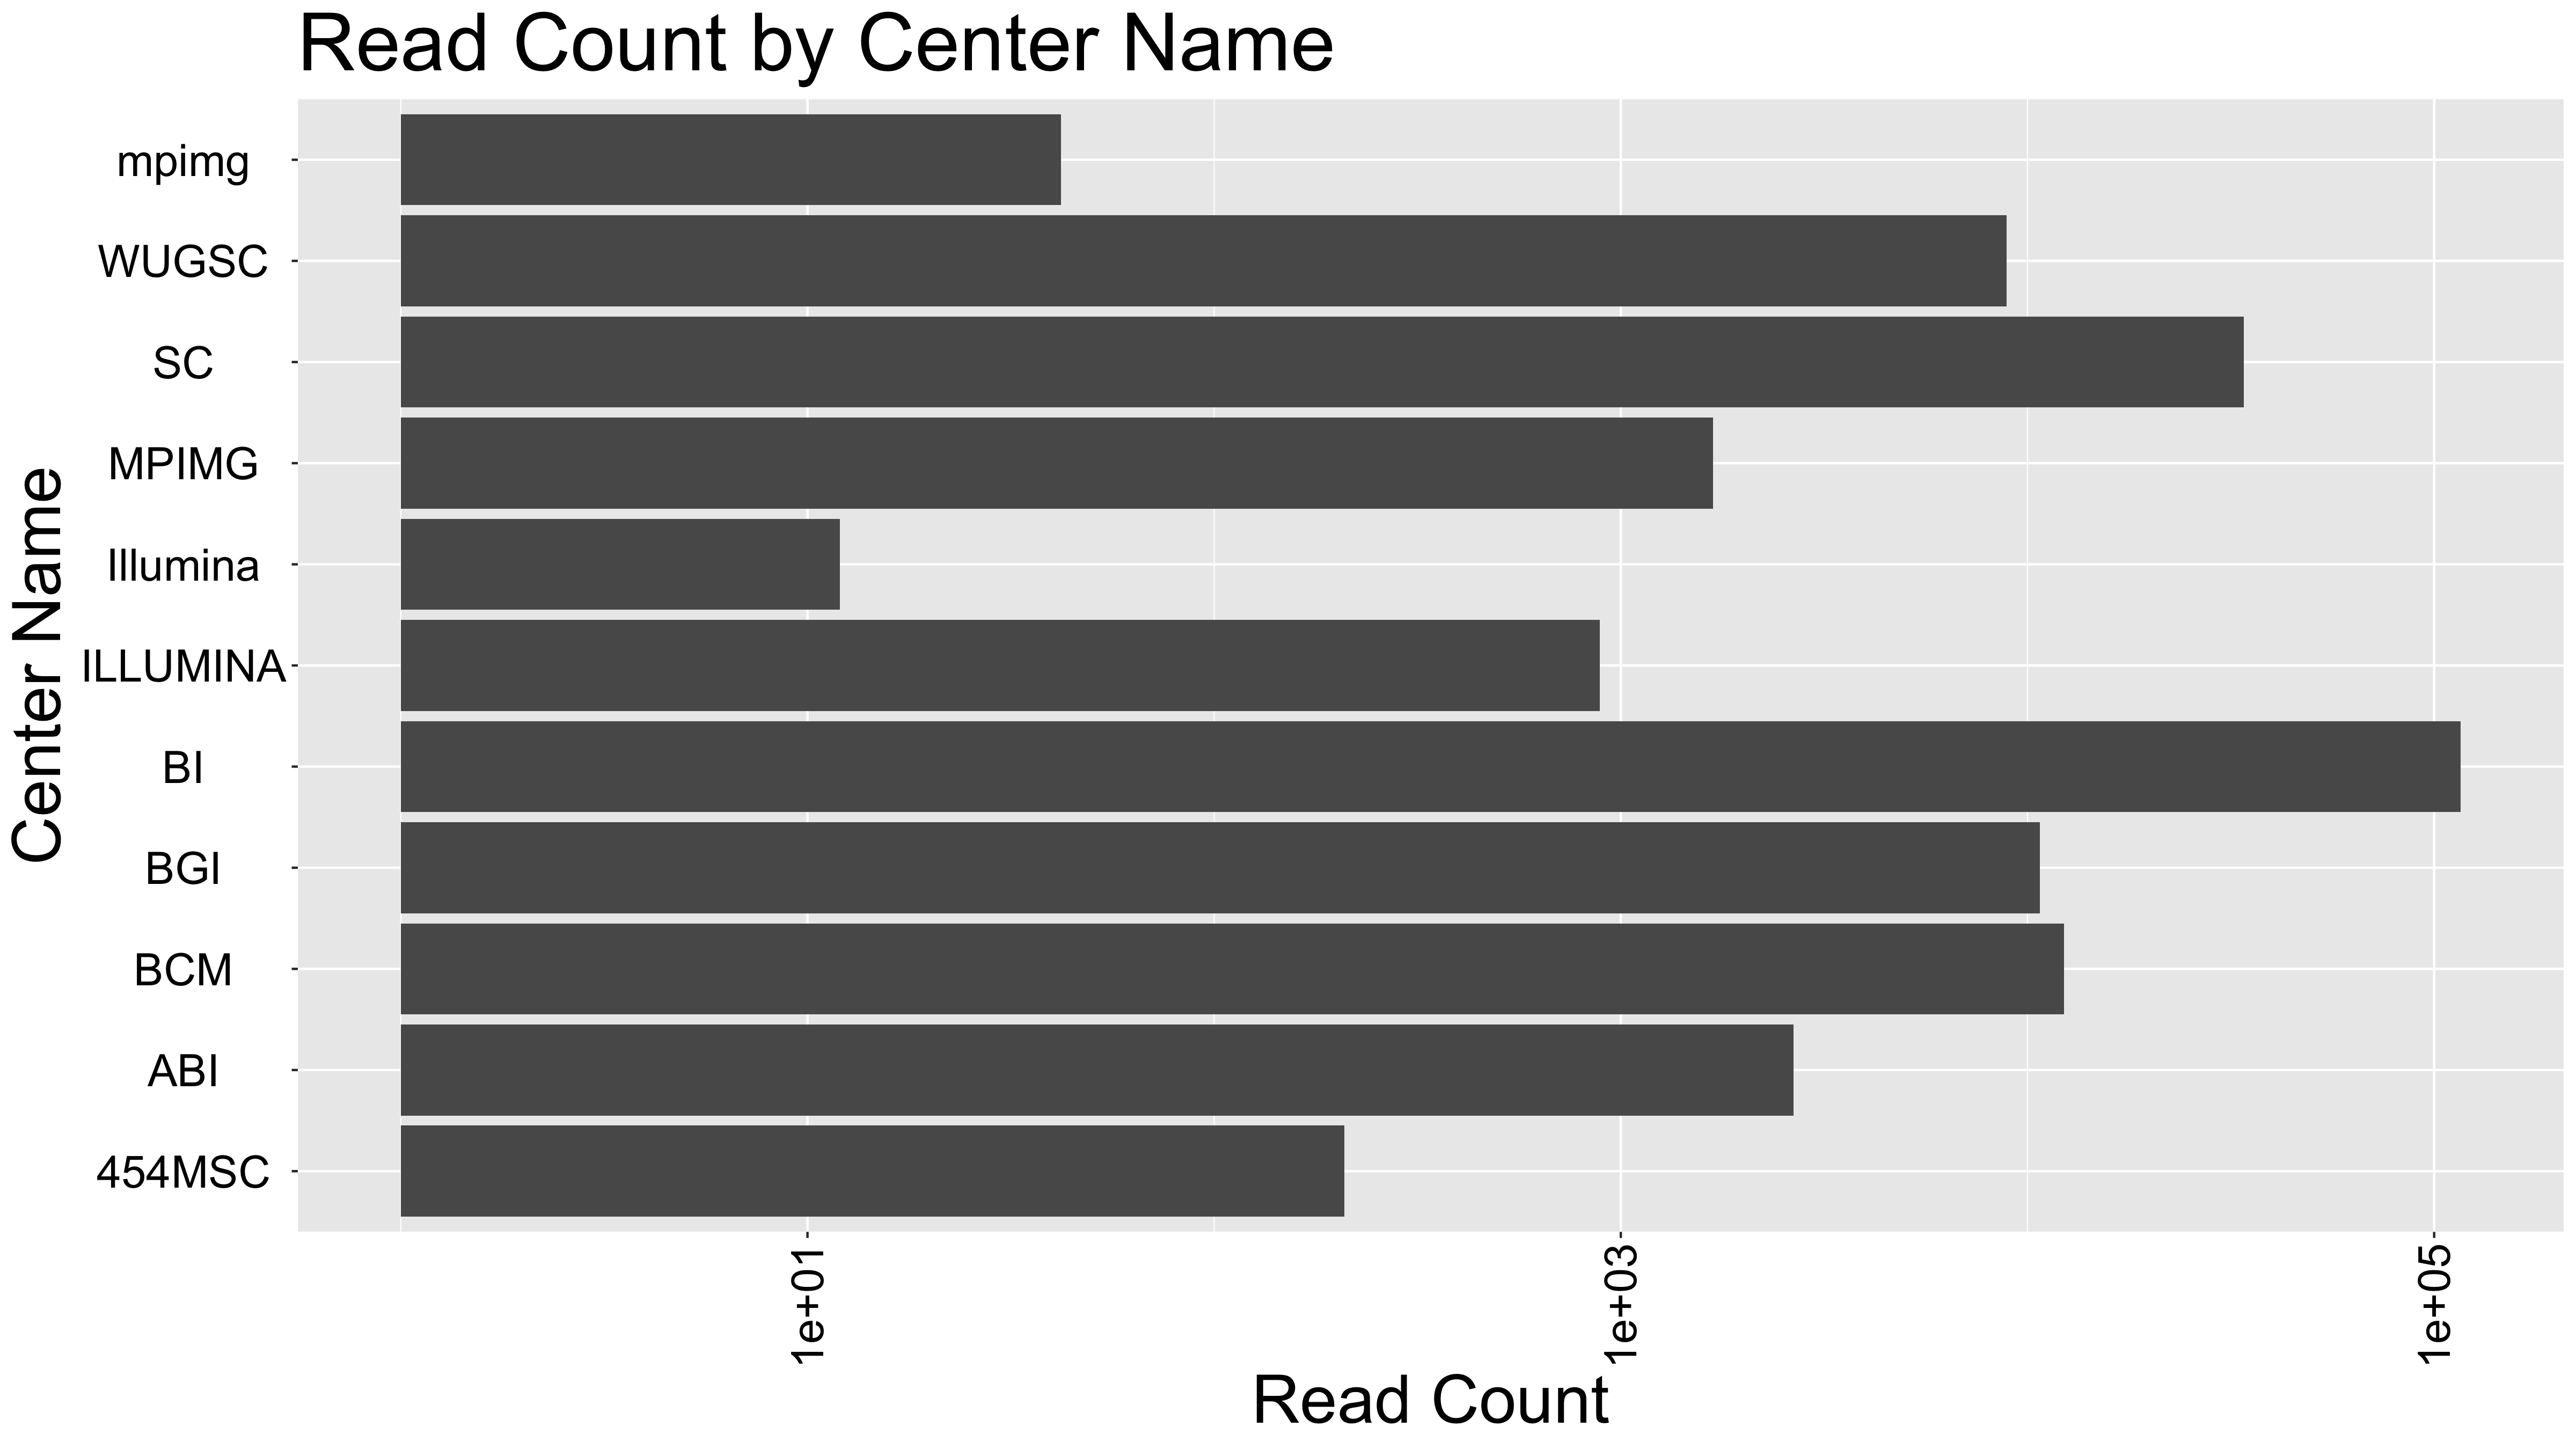

In [89]:
ggplot2.theme = SignatureTranslatedFunction(ggplot2.theme,
                                            init_prm_translate = {'axis_text_x': 'axis.text.x'})

bar = ggplot2.ggplot(seq_data) + ggplot2.geom_bar() + ggplot2.aes_string(x='CENTER_NAME') + ggplot2.theme(axis_text_x=ggplot2.element_text(angle=90, hjust=1, size=20), axis_text_y=ggplot2.element_text(size=20), text=ggplot2.element_text(size=30)) + ggplot2.scale_y_log10() + ggplot2.labs(x='Center Name', y='Read Count', title='Read Count by Center Name') + ggplot2.coord_flip()

robjects.r.png('out.png', width=16, height=9, units="in", res=300) 
bar.plot()
dev_off = robjects.r('dev.off')
dev_off()
Image(filename='out.png')